## MNIST with Batch Normalization


In [66]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

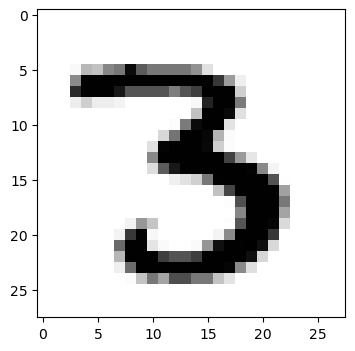

In [77]:
## for this project
## we'll be using the mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
## making sure the datasets have (28, 28, 1) shape
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)
input_size = (28, 28, 1)
## converting the lables to categories
## we have 10 digit in the set
## so the # of classes will be 10
n_classes = 10
y_train, y_test = keras.utils.to_categorical(y_train, n_classes), keras.utils.to_categorical(y_train, n_classes)
## checking the images
plt.figure(figsize=(4, 4))
plt.imshow(x_train[12], cmap='Greys')

In [84]:
## next, we will create our model
## we can manually normalize our data
## beforehand, or simply have the batch normalization
## as the first step in our model
## and since we're using the bn
## there's already a bias added to the data
## we can simply get rid of the bias in the layer
model = keras.Sequential(
    [
     keras.Input(input_size),
     keras.layers.Flatten(),
     keras.layers.BatchNormalization(),
     keras.layers.Dense(300, use_bias=False),
     keras.layers.BatchNormalization(),
     keras.layers.Activation('relu'),
     keras.layers.Dense(100, use_bias=False),
     keras.layers.BatchNormalization(),
     keras.layers.Activation('relu'),
     keras.layers.Dense(n_classes,'softmax', {'axis':-1})
    ]
)

## defining our params
epochs = 20
learning_rate = 1e-2

## creating our loss and optimizer
criterion = keras.losses.sparse_categorical_crossentropy
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss=criterion, optimizer=optimizer, 
             metrics=['accuracy'])
X, y = train
X_test, y_test = test
model.fit(X,y, epochs=epochs, batch_size = 128, verbose=0, validation_split=.2)
score = model.evaluate(X_test, y_test)
print(f'test loss: {score[0]}, test accuracy: {score[1]*100}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.3271
test loss: 0.2964291274547577, test accuracy: 97.7400004863739%
